### Importing libraries and data

In [ ]:
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from collections import Counter #for Smote, 

# Import libraries for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from genetic_selection import GeneticSelectionCV
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# undersampling requirements
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss

#genetic algoritm for hyper parameter tuning
from tpot import TPOTClassifier
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/santander_train.csv', header=0)
train_data.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/santander_test.csv', header=0)
test_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
X = train_data.drop('TARGET', axis=1)
y = train_data['TARGET']

### Resampling

In [ ]:
# defining a function to resample the dataset
def undersample(X,y,ratio):
  counter = Counter(y)
  print(counter)
  undersample = NearMiss(version=1, n_neighbors=3, sampling_strategy=ratio)
  X_new, y_new = undersample.fit_resample(X,y)
  counter = Counter(y_new)
  print(counter)
  return X_new, y_new

In [ ]:
# Creating datasets with different ratio of data
X_1, y_1 = undersample(X, y, 1)
X_2, y_2 = undersample(X, y, 0.5)
X_3, y_3 = undersample(X, y, 0.3)

Counter({0: 73012, 1: 3008})
Counter({0: 3008, 1: 3008})
Counter({0: 73012, 1: 3008})
Counter({0: 6016, 1: 3008})
Counter({0: 73012, 1: 3008})
Counter({0: 10026, 1: 3008})


Feature selection using GA and selectkbest

In [ ]:
#genetic algorithm feature selection using decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
model = GeneticSelectionCV(
    clf, cv=3, verbose=0,
    scoring="accuracy", max_features=10,
    n_population=100, crossover_proba=0.2,
    mutation_proba=0.8, n_generations=100,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X_3, y_3)


In [ ]:
cols = model.get_support(indices=True) #get column indices
print("\n cols = ", cols, "\n")


 cols =  [ 87 145 169 230 296 313 369] 



In [ ]:
#genetic algorithm feature selection using gradient boosting classifier
clf2 = GradientBoostingClassifier(random_state=0)
model2 = GeneticSelectionCV(
    clf2, cv=3, verbose=0,
    scoring="accuracy", max_features=10,
    n_population=100, crossover_proba=0.2,
    mutation_proba=0.8, n_generations=100,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model2 = model2.fit(X_1, y_1)


In [ ]:
cols2 = model2.get_support(indices=True) #get column indices
print("\n cols = ", cols2, "\n")


 cols =  [ 13  62  90 131 200 230 242 244 262 369] 



In [ ]:
# only one feature is common between the selected features using two classifiers with genetic algorithm and we have 17 unique variables selected from ga
ga_features = np.concatenate([cols,cols2])

In [ ]:
ga_features = ga_features.tolist()
ga_features.pop()
ga_features

[87, 145, 169, 230, 296, 313, 369, 13, 62, 90, 131, 200, 230, 242, 244, 262]

In [ ]:

#making 25 feature set by filling rest with select k best
selector = SelectKBest(k=9)

selector.fit_transform(X_2,y_2)

feature_names_out = selector.get_support(indices=True).tolist()
print(feature_names_out)
features_25 = ga_features+feature_names_out

[2, 25, 91, 256, 257, 258, 278, 281, 327]


In [ ]:

#making 50 feature set by filling rest with select k best
selector = SelectKBest(k=34)

selector.fit_transform(X_2,y_2)

feature_names_out2 = selector.get_support(indices=True).tolist()
print(feature_names_out2)
features_50 = ga_features+feature_names_out2

[2, 15, 18, 25, 64, 91, 126, 127, 130, 131, 139, 159, 255, 256, 257, 258, 260, 275, 278, 279, 280, 281, 292, 293, 298, 299, 300, 301, 302, 303, 312, 324, 326, 327]


In [ ]:
X_tune_25 = X_2.iloc[:,features_25]
X_tune_50 = X_2.iloc[:,features_50]

In [ ]:
# using SMOTE to balance the data

smote = SMOTE(random_state = 42)

X_res, y_res = smote.fit_resample(X, y)
print(y.value_counts())
print(y_res.value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64
0    73012
1    73012
Name: TARGET, dtype: int64


In [ ]:
X_train_25 = X_res.iloc[:,features_25]
X_train_50 = X_res.iloc[:,features_50]

In [ ]:
test_25 = test_data.iloc[:,features_25]
test_50 = test_data.iloc[:,features_50]

### Hyper parameter tuning using genetic algorithm

In [ ]:
# hyperparameter tuning using genetic algorithm
clf = RandomForestClassifier()
# randomforestclassifier
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_tune_25,y_2)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.834973	0.0883024  	0.91988    	0.666667   
1  	19    	0.882103	0.027375   	0.91988    	0.838098   
2  	20    	0.909164	0.0215989  	0.921099   	0.86414    
3  	18    	0.9209  	0.000428614	0.921543   	0.91988    
4  	19    	0.920878	0.00035737 	0.921543   	0.920324   
5  	19    	0.920977	0.000621852	0.921653   	0.919437   
6  	16    	0.921044	0.000470803	0.921653   	0.920213   
7  	17    	0.921243	0.000538454	0.921653   	0.920213   
8  	17    	0.921487	0.000258702	0.921653   	0.920878   
9  	20    	0.921288	0.000547501	0.921653   	0.920213   
10 	19    	0.921188	0.000553635	0.921653   	0.919991   
11 	17    	0.921376	0.000351305	0.921764   	0.920878   
12 	19    	0.921465	0.000364346	0.921764   	0.920767   
13 	18    	0.921543	0.000393356	0.922097   	0.920545   
14 	19    	0.921676	0.000502473	0.922097   	0.920324   
15 	17    	0.921487	0.00051562 	0.922097   	0.920656   
16 	18    	0.921565	0.000434307	0.922097   	0.92

GASearchCV(crossover_probability=0.8,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_leaf_nodes=24,
                                            min_weight_fraction_leaf=0.011241344703448047,
                                            n_estimators=294),
           generations=35, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x7f0daa05c350>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f0daa05c390>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f0daa05c1d0>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f0daa05c3d0>},
           population_size=10, return_train_score=True, scoring='accuracy')

In [ ]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.011241344703448047,
 'bootstrap': True,
 'max_leaf_nodes': 24,
 'n_estimators': 294}

In [ ]:
#hyperparameter tuning for decision tree classifier
clf2 = DecisionTreeClassifier()
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'max_leaf_nodes': Integer(2, 35), 
              'min_samples_split': Integer(2,10),
              'criterion': Categorical(['entropy', 'gini'])}

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator2 = GASearchCV(estimator=clf2,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator2.fit(X_tune_25,y_2)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.870844	0.078211   	0.931073   	0.720634   
1  	17    	0.890913	0.0596321  	0.931073   	0.720634   
2  	18    	0.918728	0.0101077  	0.931184   	0.908355   
3  	20    	0.927039	0.0081235  	0.931184   	0.910683   
4  	16    	0.931139	7.35068e-05	0.931184   	0.930962   
5  	19    	0.931184	4.95582e-05	0.931294   	0.931073   
6  	17    	0.931172	5.9676e-05 	0.931294   	0.931073   
7  	16    	0.93115 	7.09566e-05	0.931184   	0.930962   
8  	18    	0.931217	7.09566e-05	0.931294   	0.931073   
9  	18    	0.931206	6.64894e-05	0.931294   	0.931073   
10 	18    	0.931161	8.29268e-05	0.931294   	0.930962   
11 	18    	0.931161	8.29268e-05	0.931294   	0.930962   
12 	19    	0.93115 	9.9734e-05 	0.931294   	0.930962   
13 	19    	0.931217	5.07821e-05	0.931294   	0.931184   
14 	17    	0.931228	5.42883e-05	0.931294   	0.931184   
15 	17    	0.931228	5.42883e-05	0.931294   	0.931184   
16 	16    	0.931272	4.43262e-05	0.931294   	0.93

GASearchCV(crossover_probability=0.8,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=DecisionTreeClassifier(criterion='entropy',
                                            max_leaf_nodes=13,
                                            min_samples_split=6,
                                            min_weight_fraction_leaf=0.01013856339249382),
           generations=35, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'criterion': <sklearn_genetic.space.space.Categorical object at 0x7f0da9ecd190>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f0da9ecd890>,
                       'min_samples_split': <sklearn_genetic.space.space.Integer object at 0x7f0da9ecddd0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f0da9ecd8d0>},
           population_size=10, return_train_score=True, scoring='accuracy')

In [ ]:
evolved_estimator2.best_params_

{'min_weight_fraction_leaf': 0.01013856339249382,
 'max_leaf_nodes': 13,
 'min_samples_split': 6,
 'criterion': 'entropy'}

### Training the models with tuned parameters

In [ ]:
#training and testing on the hyper parameter tuned models

#random forest classifier
model1 = RandomForestClassifier(min_weight_fraction_leaf = 0.011241344703448047,
                                max_depth=None,
                                bootstrap=True,
                                max_leaf_nodes=24,
                                n_estimators=294)

#decision treee classifier
model2 = DecisionTreeClassifier(min_weight_fraction_leaf=0.01013856339249382,
                                max_depth=10,
                                max_leaf_nodes=113,
                                min_samples_split=6,
                                criterion='entropy')

In [ ]:
#predicting on rfc
model1.fit(X_train_25,y_res)
pred_rf_25 = model1.predict_proba(test_25)

model1.fit(X_train_50,y_res)
pred_rf_50 = model1.predict_proba(test_50)

In [ ]:
#predicting on dtc
model2.fit(X_train_25,y_res)
pred_dt_25 = model2.predict_proba(test_25)

model2.fit(X_train_50,y_res)
pred_dt_50 = model2.predict_proba(test_50)

### Kaggle submission scores for all four models

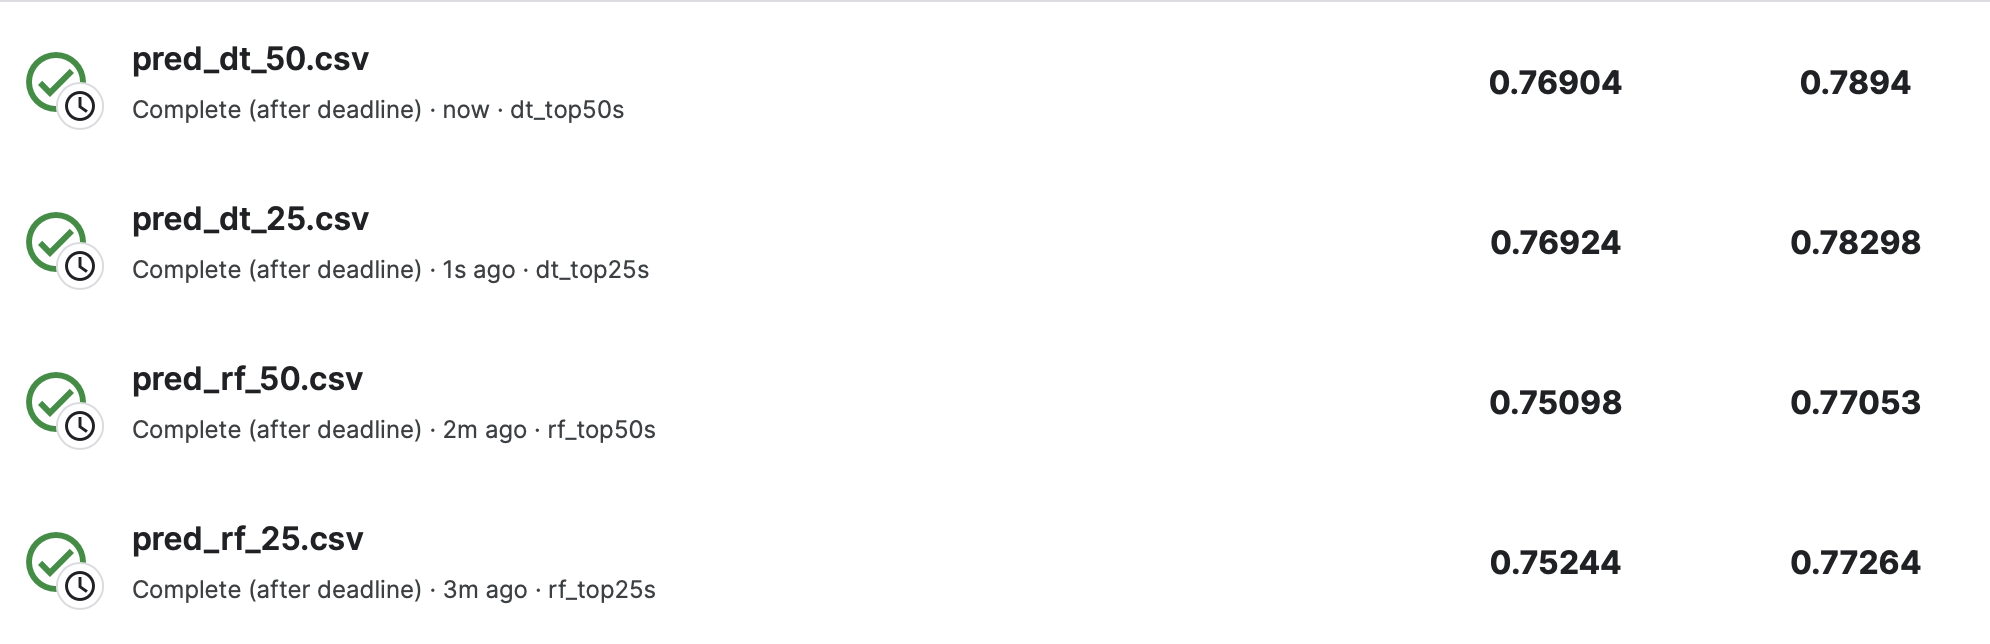

In [ ]:
from IPython.display import Image
Image('/content/Screen Shot 2022-11-15 at 1.25.18 AM.png')